**Science;** *Seeking knowledge through insight and resources, and then applying that knowledge for personal interest.*

**Scientist;** *The person who does science.*

**How does science work?** *The scientist gains information, builds theories, tests them to prove until a right idea emerges, and then applies that for gains of interest. aka Scientific Method*

**Data Science;** *For the sake of a particular interest(i.e gaining profit), using data to get insights, building theories based on the insight, proving those theories, and then applying them.*

**Through this data set I'll try to go through all the stages that are the base of science i.e The Scientific Method**

**The Scientific Method:** *The Scientific Method includes:*
- Defining problem to be solved/ interest to be gained/ Question to be answered
- Getting data
- Making observations/getting insight from data
- Build Theories bases on observations
- Experimenting/Testing the Theories
- Applying proved theories
- Determine solution

# Let's start the scientific method

# 1- Question 

- **Given certain characters I want to tell whether a person has a heart problem or not.**
- **Is there a chance of getting heart disease for that person?**

# 2- Getting data

I have got a data set of heart patients from Kaggle.com.

# 3- Making observations/Getting Insight

Now I'll use some methods to infer insights from the data set.

# Heart Failure Dataset

*To Predict Heart Disease*

### Exploratory Data Analysis

In [1]:
# importing required libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# importing heart data set
heart = pd.read_csv('heart.csv')

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart.shape

(918, 12)

In [4]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Observations also include prior information related to the data that may help to understand the relations.

### Prior Information

#### MaxHR

MaxHR for an age is calculated as; MaxHR = 220-age
- for moderately intense activity Heart Rate should be 64% - 76% of MaxHR
- for vigorous activity Heart Rate should be 77% - 94% of MaxHR

#### Blood Pressure

A normal BP leve is 120/80 mmHg no matter age

#### Cholesterol and Sugar

LDL cholesterol level is 100-100 mg/dL, border line is 100-125 mg/dL.

Normal fasting blood sugar is 99 mg/dL or low. 100 to 125 indicates prediabetes. 126 or higher indicates diabetes.

### **What information do I have?**

In [8]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

- MaxHR
- Cholesterol level ranges
- Sugar level ranges
- blood pressure level ranges

To go further into observations I must first figure out the features that are of no use to me.

Let's divide our features into types: cause, indicator, for heart disease

Age is not an effect. But, some diseases are more common in a particular age.

Sex related diseases also exist. Some diseases are more common and related to a particular sex.

For now, Age, Sex are also inluded in causes.

Let's modify this data set to aid in visualization

I'll add HeartRatePct column to indicate the Heart Rate Percentage of the person with respect to Normal Heart Rate in that Age in order to compare it with normal MaxHR range.

In [15]:
heart_cp = heart.copy()
heart_cp['ExerciseAngina'] = heart_cp['ExerciseAngina'].map({'N':0, 'Y':1})
heart_cp.ExerciseAngina = heart_cp.ExerciseAngina.astype('int') # changed Exercise Angina indicators to Int
heart_cp['HeartRatePct'] = round((heart_cp['MaxHR'] / (220 - heart_cp['Age']))*100)
# column indicating Heart Rate percentage of the person, with respect to expected Heart Rate
heart_cp['HeartRatePct'] = heart_cp['HeartRatePct'].astype('int64')

# if heart rate is 64-76% of MaxHR for moderate activity, that's fine
# 0 for normal, 1 for abnormal
heart_cp['HeartRateRemarks'] = 0
def normal(row):
    MaxHR = 220-row.Age
    HRPct = (row.MaxHR/MaxHR)*100 
    if 64<= HRPct <=76:
        row.HeartRateRemarks = 0
    else:
        row.HeartRateRemarks = 1
    return row
heart_cp = heart_cp.apply(normal, axis=1)
heart_cp['HeartRateRemarks'] = heart_cp['HeartRateRemarks'].astype('int64')

In [16]:
heart_cp.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartRatePct,HeartRateRemarks
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0,96,1
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1,91,1


In [26]:
causes = heart_cp[['Age', 'Sex', 'Cholesterol', 'FastingBS', 'HeartDisease']]
indicators = heart_cp[['ChestPainType', 'RestingBP', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartRatePct', 'HeartRateRemarks', 'HeartDisease']]

In [27]:
causes.head()

,Age,Sex,Cholesterol,FastingBS,HeartDisease
0,40,M,289,0,0
1,49,F,180,0,1
2,37,M,283,0,0
3,48,F,214,0,1
4,54,M,195,0,0


In [29]:
indicators.head()

,ChestPainType,RestingBP,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartRatePct,HeartRateRemarks,HeartDisease
0,ATA,140,Normal,172,0,0.0,Up,96,1,0
1,NAP,160,Normal,156,0,1.0,Flat,91,1,1
2,ATA,130,ST,98,0,0.0,Up,54,1,0
3,ASY,138,Normal,108,1,1.5,Flat,63,1,1
4,NAP,150,Normal,122,0,0.0,Up,73,0,0


I've separated causes and effects.

I've made some changes to original data set and divided it into causes and indicators for future uses, if needed.

let's divide the data set into heart disease +ve(1) and -ve(0) data sets

In [30]:
positive, negative = [x for _, x in heart.groupby(heart['HeartDisease'] == 0)]
positive.head(2) # data set with +ve heart disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


In [31]:
negative.head(2)  # dataset with -ve heart disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


#### Let's Explore Relationships

using Statistics/Mathematics/Visulizations

I'll first analyze causes relation with disease occurance.

### **Age**

##### for +ve dataset examine the relationship between age groups and occurence of heart disease

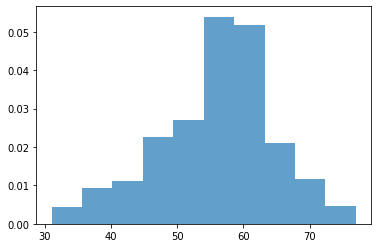

In [33]:
ax = plt.hist(data=positive, bins=10, x='Age', density=1, histtype='bar', alpha=0.7)


This indicates most of the patients are in the age 55-65. Fewer of other ages have disease.

let's examine this for whole data set

<AxesSubplot:ylabel='Frequency'>

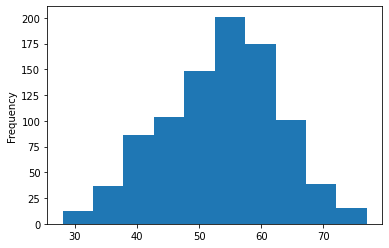

In [34]:
heart_cp['Age'].plot.hist()

the above graph shows that major age group is that of 50s to 60s, in the data set.

let's check this for negative

<AxesSubplot:ylabel='Frequency'>

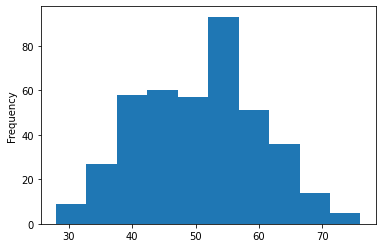

In [36]:
negative['Age'].plot.hist()

<AxesSubplot:xlabel='Age', ylabel='Count'>

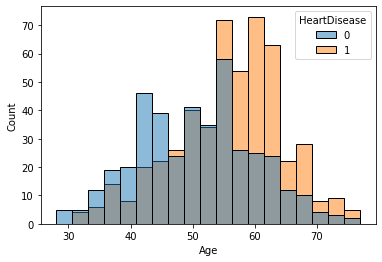

In [38]:
sns.histplot(data=heart_cp, x='Age', hue='HeartDisease')

this overlap shows patients above 50s of Age.

let's examine the correlation b/w different features in the mein dataset

<AxesSubplot:>

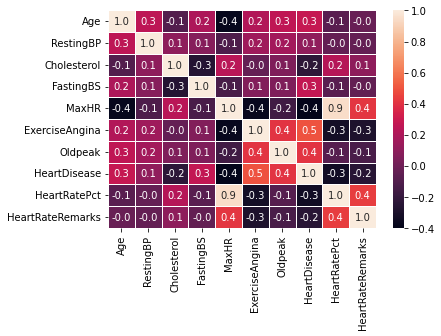

In [39]:
import numpy as np

corr = heart_cp.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,linewidths=.5,fmt=".1f")

```the above heatmap represents correlation b/w different features;
- there is a strong -ve correlation b/w Age n MaxHR, MaxHR n HeartDisease, FastingBS n Cholesterol
- there is a medium level -ve correlation b/w Cholesterol n HeartDisease,
- somewhat +ve correlation b/w Oldpeak n HeartDisease, FastingBS n HeartDisease
- there exists no strong +ve correlation```

`Max-Heart-Rate is an indication for heart activity. So, MaxHR will be counted as symbol rather than as cause of heart disease.`

`Age and MaxHR do have relation. Their ration may be counted as a sign for a heart disease.`

`*** There may be a relation b/w Age and Heart Disease, as Age may also be a factor.`

`Fasting reduces blood sugar and cholesterol level.
+ve sugar in Fasting is also a factor to heart disease. And, cholesterol too.`

`+ve Fasting blood sugar means diabetes. Diabetes is among major factors of heart diseases.`

## 'Correlation does not necessarily indicates causation.'

Like +ve diabetes also carries a risk of high LDL cholesterol and oldpeak 0 means no heart disease otherwise a heart disease.

### let's visualize causes' relation

In [ ]:
causes.columns

### **Normal and Patients**

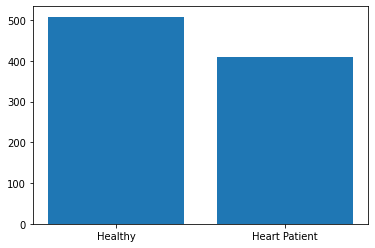

In [10]:
health = heart['HeartDisease']
healthy = {1:'Heart Patient', 0:'Healthy'}
health = health.map(healthy)
ax = plt.bar(data=health, x=health.unique(), height=health.value_counts())

conclusion; in our data set about 400 objects are heart patients

#### Age - MaxHR

MaxHR for an age is calculated as; MaxHR = 220-age
- for moderately intense activity Heart Rate should be 64% - 76% of MaxHR
- for vigorous activity Heart Rate should be 77% - 94% of MaxHR

In [12]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartRatePct
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,96
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,91
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,54
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,63
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,73


The HeartRatePct feature adds to out dataset to have a good understanding of Heart.

Let's check how different features are related to +ve heart disease and other features

### ***Analysis***

#### **HeartDisease vs ChestPainType**

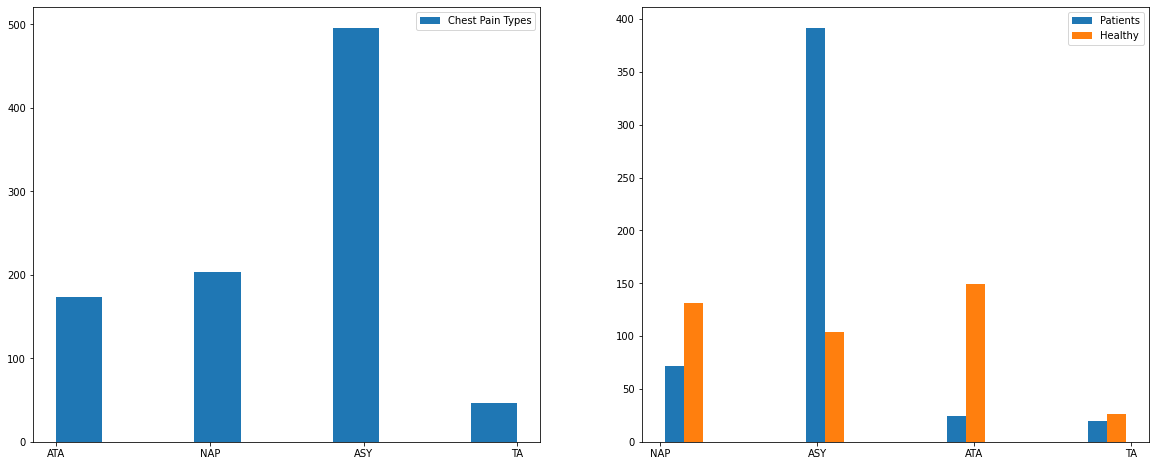

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[1].hist(
                data=heart, x=[heart[heart['HeartDisease']==1]['ChestPainType'], 
                heart[heart['HeartDisease']==0]['ChestPainType']],
                label=['Patients', 'Healthy']
            )
ax[1].legend()
ax[0].hist(
    data = heart, x='ChestPainType', label = 'Chest Pain Types'
)
ax[0].legend()
# plt.show()

**conclusion; Above Graphs show that Chest Pain of type 'ASY' is most common among Heart Patients.**

Let's plot ASY type Chest Pain with other features in heart patients

In [14]:
tem_map = {1:'yes', 0:'no'}
heart_cp = heart.copy()
heart_cp['HeartDisease'] = heart_cp['HeartDisease'].map(tem_map)


<AxesSubplot:xlabel='ChestPainType', ylabel='RestingBP'>

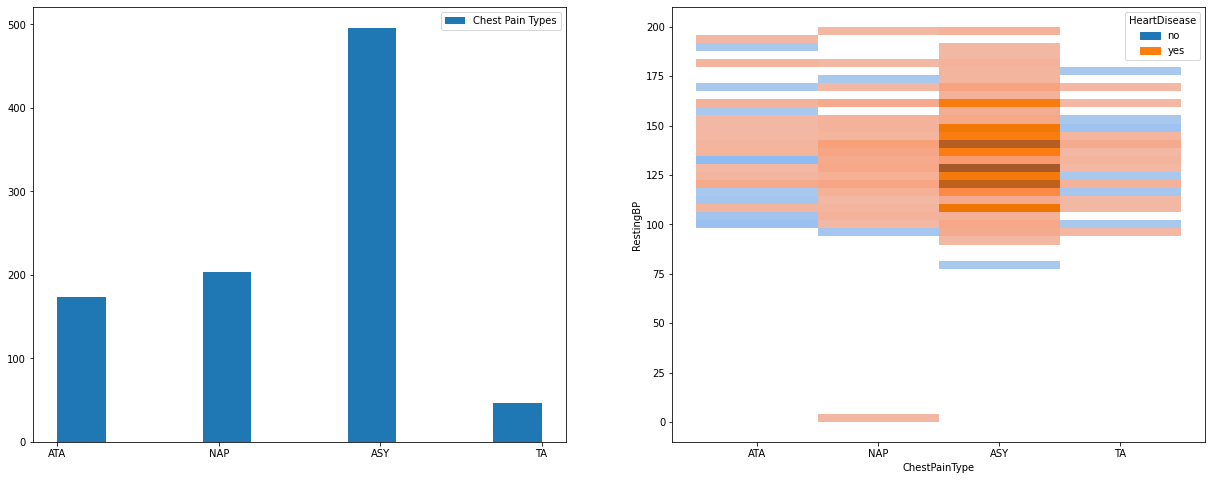

In [15]:
fig, ax = plt.subplots(1,2,figsize=(21,8))
ax[0].hist(
    data = heart, x='ChestPainType', label = 'Chest Pain Types'
)
ax[0].legend()
sns.histplot(x=heart_cp['ChestPainType'], y=heart_cp['RestingBP'], color='blue', hue=heart_cp['HeartDisease'], ax=ax[1])

there are patients in ASY type chest pain

/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChestPainType', ylabel='RestingBP'>

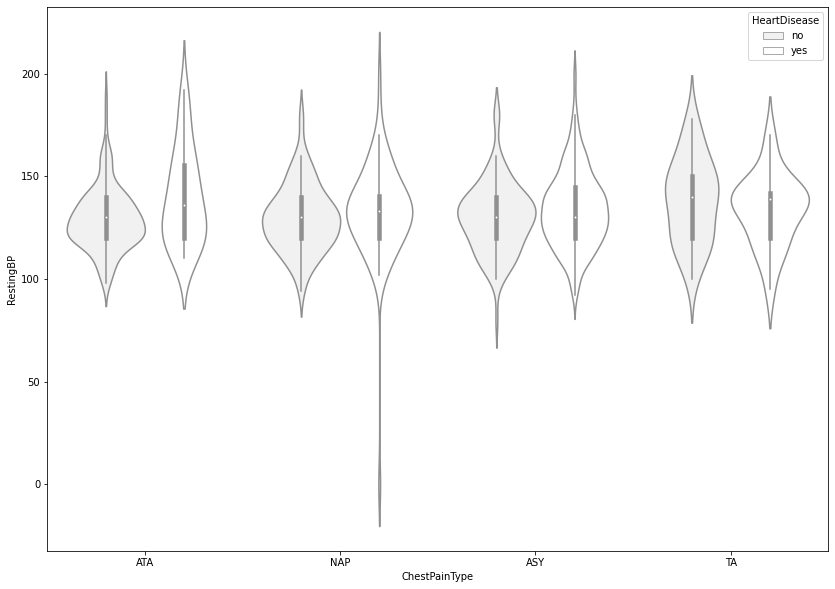

In [16]:
fig, ax = plt.subplots(1,figsize=(14,10))
sns.violinplot(heart_cp['ChestPainType'], heart_cp['RestingBP'], color='white', hue=heart_cp['HeartDisease'], ax=ax)

most of the data is distributed accross 120-155 RestingBP.

#### **HeartDisease vs RestingBP**

<AxesSubplot:ylabel='Frequency'>

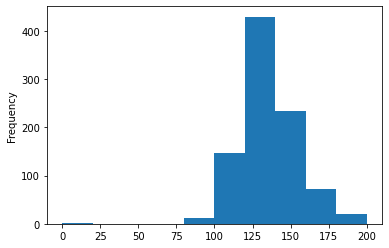

In [17]:
heart['RestingBP'].plot.hist()

most of people in the dataset had BP around 125

I ploted above histogram just to chaeck what %age of guys have high Resting BP

Now, let's see healthy and patients persons in each blood pressure range

In [18]:
len(heart['RestingBP'].unique())

67

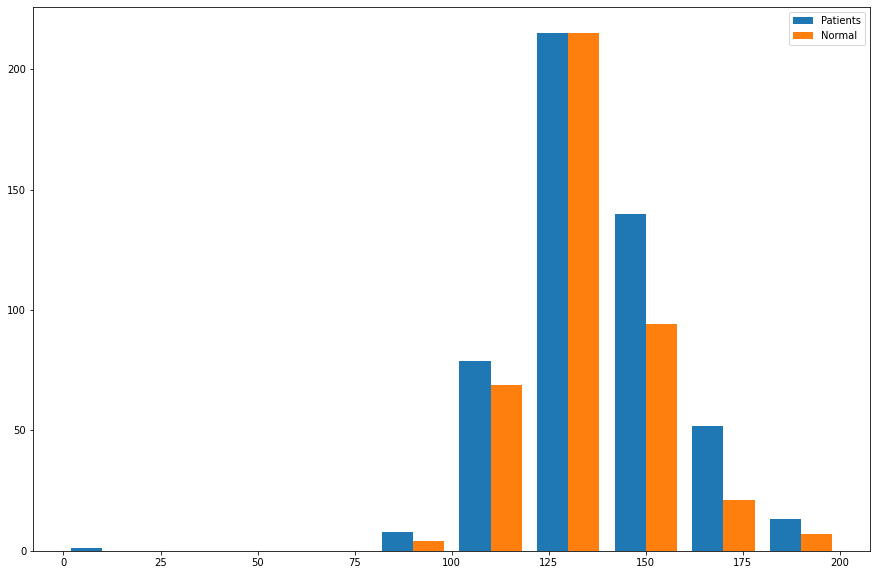

In [19]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax.hist(data=heart, x = [heart[heart['HeartDisease']==1]['RestingBP'], heart[heart['HeartDisease']==0]['RestingBP']],
                label=['Patients', 'Normal'])
ax.legend()

in each category there are more patients than healthy people

let's try to catch a clearer picture. Plotting RestingBP along distribution among HeartDisease

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

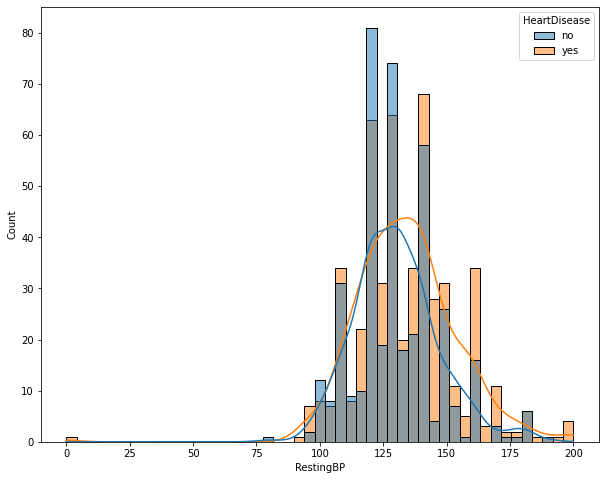

In [20]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.histplot(data=heart_cp, x='RestingBP', hue='HeartDisease', ax=ax, legend=True, kde=True, cbar=True)

**conclusions;** 
- **there are more patients around 140-160 BP**
- **there are some patients b/w 120-125 BP**
- **most of the people had BP around 125 and mostly are normal**

*I'll plot BP against Chest Pain Type.But, first let's see other features' relations with HeartDisease.*

`Since most common Chest Pain Type is ASY in patients, I'll plot this against BP.`

#### **Sex vs HeartDisease**

In [21]:
# let's see next columns to b plotted
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'HeartRatePct'],
      dtype='object')

Let's see how Disease possibility is distributed accross sexes

Text(0, 0.5, 'Count')

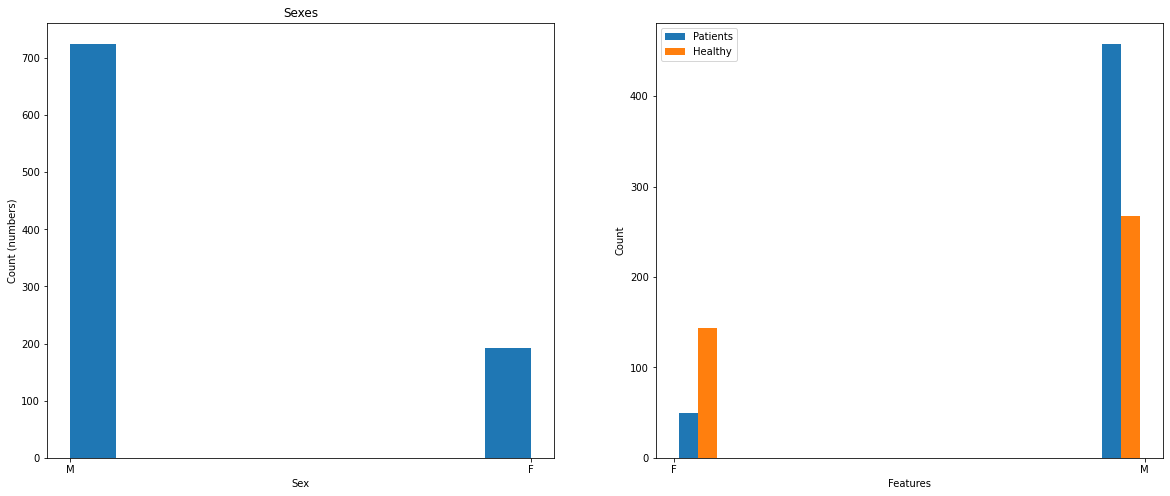

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].hist(data=heart, x='Sex')
ax[0].set_title('Sexes')
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Count (numbers)')
ax[1].hist(data=heart, x=[heart[heart['HeartDisease']==1]['Sex'], heart[heart['HeartDisease']==0]['Sex']], label=['Patients', 'Healthy'])
ax[1].legend()
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Count')

The plots show that there are more Male-patients than Female-patients.

But, we can also see that There are more men than women in the Dataset.

we can campare the ratio to check whether 'Sex' actually has some relation with HeartDisease

simply put; difference-of-total-male-female-persons-number:difference-of-male-female-patients-number

In [23]:
tmales = heart[heart['Sex']=='M']['Sex'].count()
tfemales = heart[heart['Sex']=='F']['Sex'].count()
pmales = heart[(heart['Sex']=='M')  & (heart['HeartDisease']==1)]['Sex'].count()
pfemales = heart[(heart['Sex']=='F') &  (heart['HeartDisease']==1)]['Sex'].count()
normal = round(tmales/tfemales)
patients = round(pmales/pfemales)
print('males to females ratio in total dataset: ', normal)
print('males to females ratio in patients: ', patients)

males to females ratio in total dataset:  4
males to females ratio in patients:  9


This difference of male to female ratio in total and male to females ratio in patients reflects that there is some correlation b/w Sex and Heart Diseases.

Let's confirm this by checking normal and patients ratio in a single sex i.e normal females vs patien females

In [24]:
pct_males = (pmales/tmales)*100 #patient males by total males
pct_females = (pfemales/tfemales)*100 #patient females by total females
print('patient-males/total-males: ', pct_males)
print('patient-females/total-females: ', pct_females)

patient-males/total-males:  63.172413793103445
patient-females/total-females:  25.906735751295333


- out of total males 63% were heart patients
- out of total females 26% were heart patients

**conclusion; Heart Disease is more common in males than in females.**

`Yet Sex can't be used as a criteria for Heart Disease Prediction.`

#### **Cholesterol vs HeartDisease**

Text(0, 0.5, 'Count')

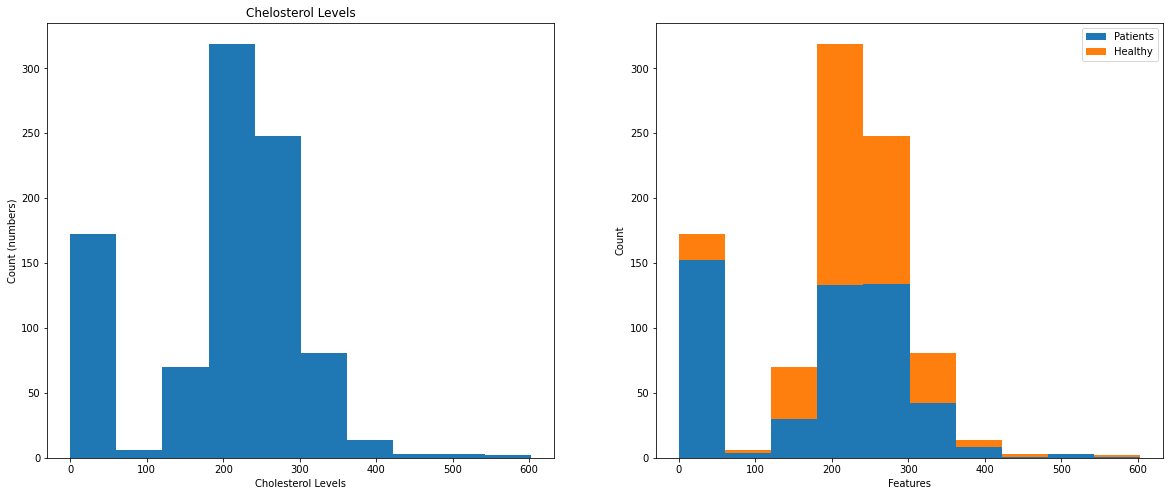

In [25]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].hist(data=heart, x='Cholesterol')
ax[0].set_title('Chelosterol Levels')
ax[0].set_xlabel('Cholesterol Levels')
ax[0].set_ylabel('Count (numbers)')
ax[1].hist(data=heart, x=[heart[heart['HeartDisease']==1]['Cholesterol'], heart[heart['HeartDisease']==0]['Cholesterol']], label=['Patients', 'Healthy'], stacked=True)
ax[1].legend()
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Count')

**conclusion;**
- **most of the people have Cholesterol b/w 0 to 50.**
- **about 50% patients had cholesterol b/w 180 and 300**

`Cholesterol and Blood Sugar[BS] have some relation. I'll explore them once related all features to HeartDisease`

#### **FastingBS vs HeartDisease**

Text(0, 0.5, 'Count')

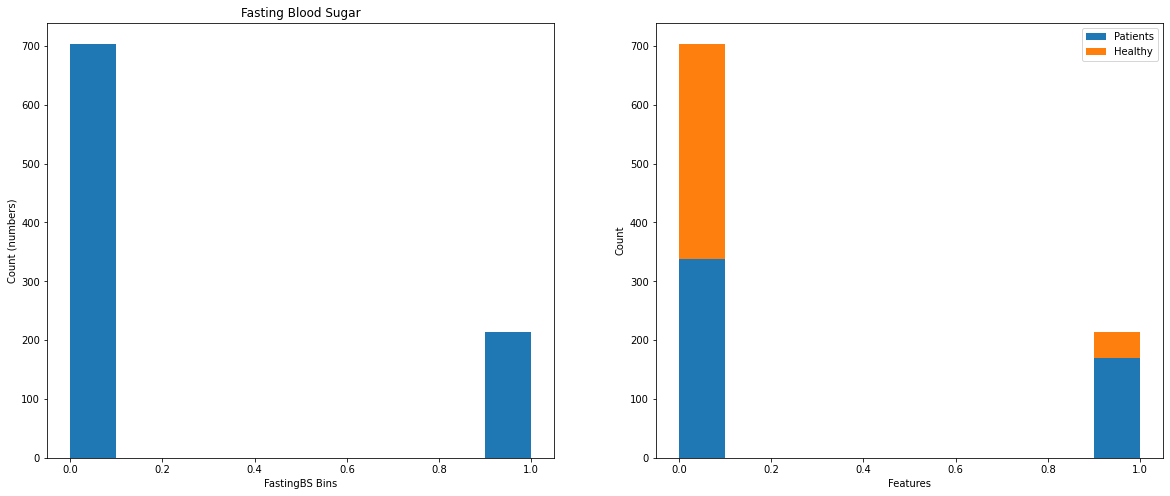

In [26]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].hist(data=heart, x='FastingBS')
ax[0].set_title('Fasting Blood Sugar')
ax[0].set_xlabel('FastingBS Bins')
ax[0].set_ylabel('Count (numbers)')
ax[1].hist(data=heart, x=[heart[heart['HeartDisease']==1]['FastingBS'], heart[heart['HeartDisease']==0]['FastingBS']], stacked=True, label=['Patients', 'Healthy'])
ax[1].legend()
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Count')

In [27]:
print('no. of healthy people with no FastinBS', heart[(heart['FastingBS']==0) &  (heart['HeartDisease']==0)]['FastingBS'].count())

no. of healthy people with no FastinBS 366


In [28]:
print('no. of healthy people with +ve FastinBS', heart[(heart['FastingBS']==1) &  (heart['HeartDisease']==0)]['FastingBS'].count())

no. of healthy people with +ve FastinBS 44


In [29]:
print('no. of patients with no FastinBS', heart[(heart['FastingBS']==0) &  (heart['HeartDisease']==1)]['FastingBS'].count())

no. of patients with no FastinBS 338


In [30]:
print('no. of patients with +ve FastinBS', heart[(heart['FastingBS']==1) &  (heart['HeartDisease']==1)]['FastingBS'].count())

no. of patients with +ve FastinBS 170


**conclusions;**
- **about 10% healthy peaople had +ve Fasting Blood Sugar**
- **about 50% patients had +ve Fasting Blood Sugar**
- `+ve blood sugar is a factor for cholesterol and heart diseases`
- `normal people with +ve blood sugar may not had developed high cholesterol levels`

`FastingBS can be plotted with other features`

#### **RestingECG vs HeartDisease**

In [31]:
heart['RestingECG'].head()

0    Normal
1    Normal
2        ST
3    Normal
4    Normal
Name: RestingECG, dtype: object

Text(0, 0.5, 'Count')

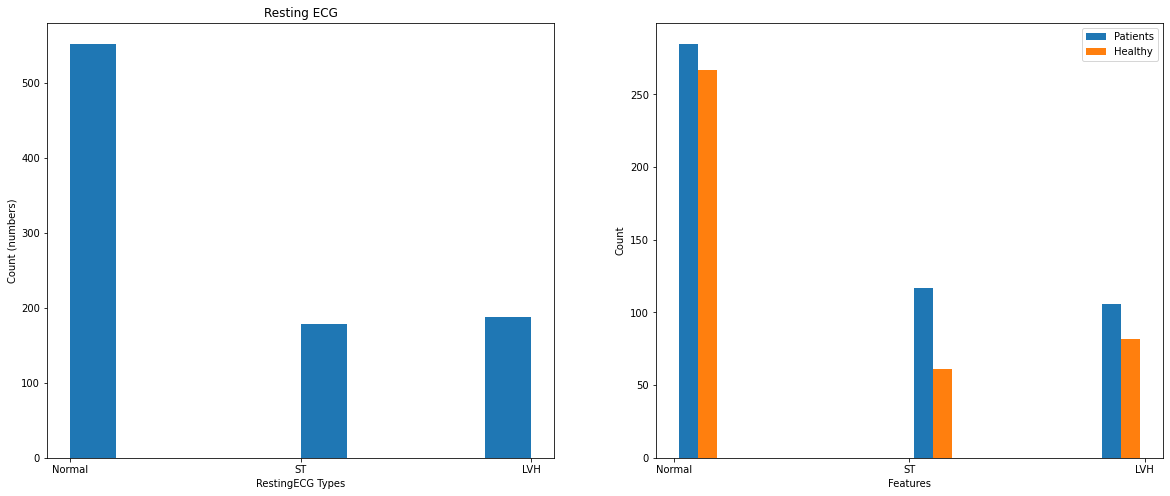

In [32]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].hist(data=heart, x='RestingECG')
ax[0].set_title('Resting ECG')
ax[0].set_xlabel('RestingECG Types')
ax[0].set_ylabel('Count (numbers)')
ax[1].hist(data=heart, x=[heart[heart['HeartDisease']==1]['RestingECG'], heart[heart['HeartDisease']==0]['RestingECG']], label=['Patients', 'Healthy'])
ax[1].legend()
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Count')

There are heart patients in each ECG category

**conclusions;**
- **Heart Patients had each type of ECG i.e Normal, ST, LVH**
- **There are still more patients with normal ECG**

`RestingECG can be plotted along other features`

In [33]:
heart.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartRatePct
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,96


#### **MaxHR vs HeartDisease**

<AxesSubplot:xlabel='MaxHR', ylabel='HeartDisease'>

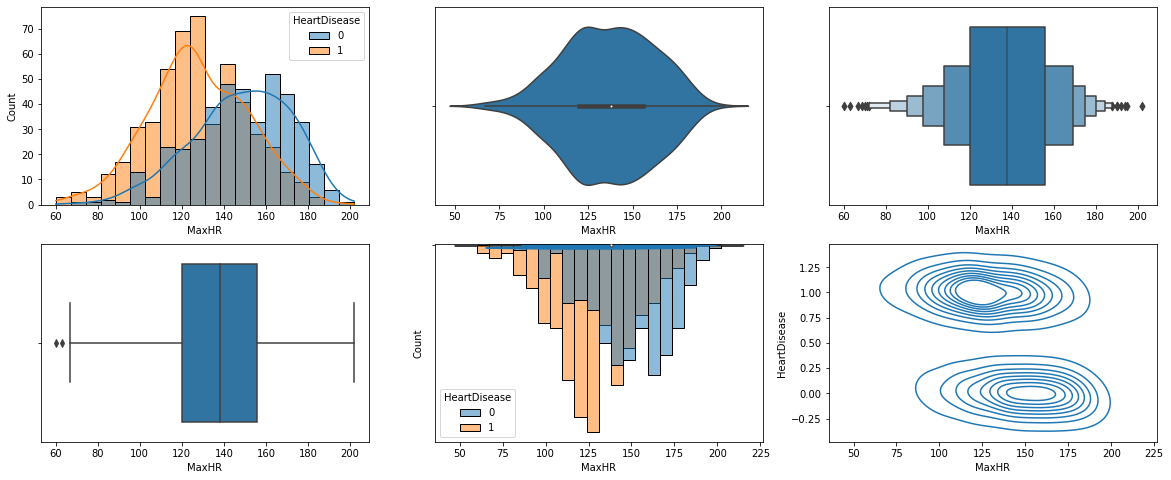

In [82]:
fig,ax = plt.subplots(2,3, figsize=(20,8))
sns.histplot(data=heart, x='MaxHR', hue='HeartDisease', legend=True, kde=True, ax=ax[0,0])
sns.violinplot(data=heart, x='MaxHR', hue='HeartDisease', ax=ax[0,1])
sns.boxenplot(data=heart, x='MaxHR', hue='HeartDisease', ax=ax[0,2])
sns.boxplot(data=heart, x='MaxHR', hue='HeartDisease', ax=ax[1,0])
sns.violinplot(data=heart, x='MaxHR', hue='HeartDisease', ax=ax[1,1])
sns.histplot(data=heart, x='MaxHR', hue='HeartDisease', ax=ax[1,1])
sns.kdeplot(data=heart, x='MaxHR', y='HeartDisease', legend=True, ax=ax[1,1])
sns.kdeplot(data=heart, x='MaxHR', y='HeartDisease', legend=True, ax=ax[1,2])


Heart patients exist b/w MaxHR 60 to 130

**conclusions;**
- **heart patients have MaxHR around 125**

In [83]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'HeartRatePct'],
      dtype='object')

#### **HeartDisease vs ExerciseAngina**

In [88]:
heart.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartRatePct
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,96
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,91
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,54
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,63


In [96]:
heart_cp = heart.copy()

In [97]:
heart_cp['ExerciseAngina'] = heart_cp['ExerciseAngina'].map({'N':0, 'Y':1})
heart_cp.ExerciseAngina = heart_cp.ExerciseAngina.astype('int')
heart_cp.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartRatePct
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0,96
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1,91


In [ ]:
positive.ExerciseAngina = positive.ExerciseAngina.map({'N':0, 'Y':1})

Text(0.5, 1.0, 'Positive Copy of Heart')

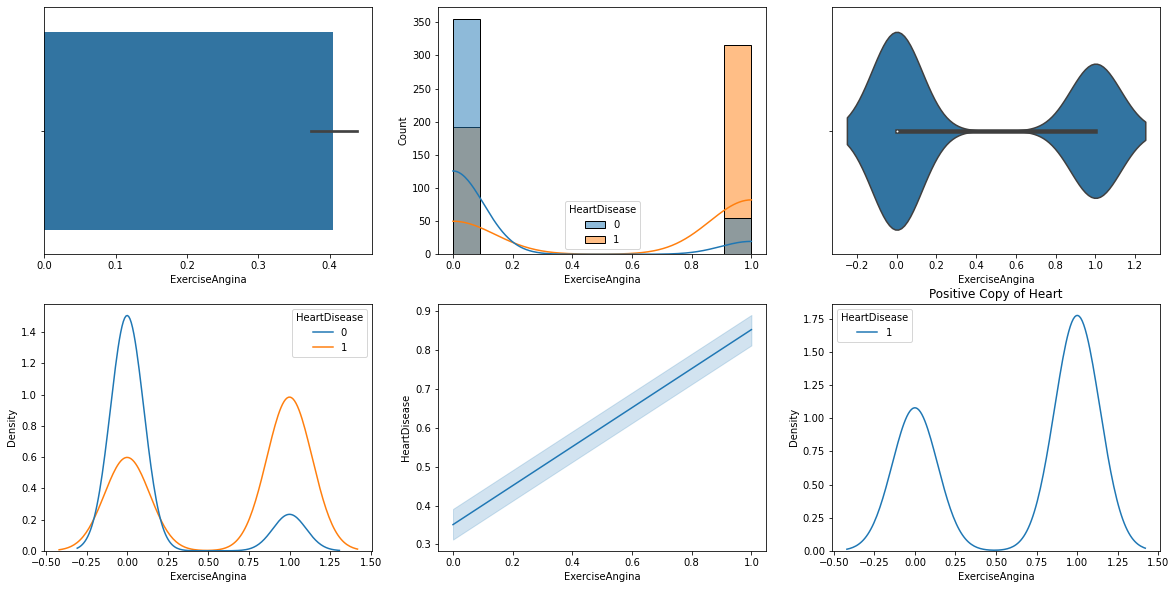

In [108]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.barplot(data=heart_cp, x='ExerciseAngina', hue='HeartDisease', ax=ax[0,0])
sns.histplot(data=heart_cp, x='ExerciseAngina', hue='HeartDisease', kde=True,legend=True, ax=ax[0,1])
sns.violinplot(data=heart_cp, x='ExerciseAngina', hue='HeartDisease', ax=ax[0,2])
sns.kdeplot(data=heart_cp, x='ExerciseAngina', hue='HeartDisease', legend=True, ax=ax[1,0])
sns.lineplot(data=heart_cp, x='ExerciseAngina', y='HeartDisease', legend=True, ax=ax[1,1])
sns.kdeplot(data=positive, x='ExerciseAngina', hue='HeartDisease', legend=True, ax=ax[1,2])
ax[1,2].set_title('Positive Copy of Heart')

this is just to see where most of the patients lie

histogram shows the number of patients with Exercise Angina

lineplot shows that Heart Disease relates to Exercise Angina directly

kdeplot show that 
- most of the Heart Patients do have Exercuse Angina, but not all.
- most of the healthy people don't have Exercise Angina, but some do have.

**conclusions;**
- **most of the patients do have Angina, but not all**
- **most of the healthy people don't have angina, but some do have**

In [109]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'HeartRatePct'],
      dtype='object')

#### **Oldpeak vs HeartDisease**

/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


<AxesSubplot:xlabel='Oldpeak'>

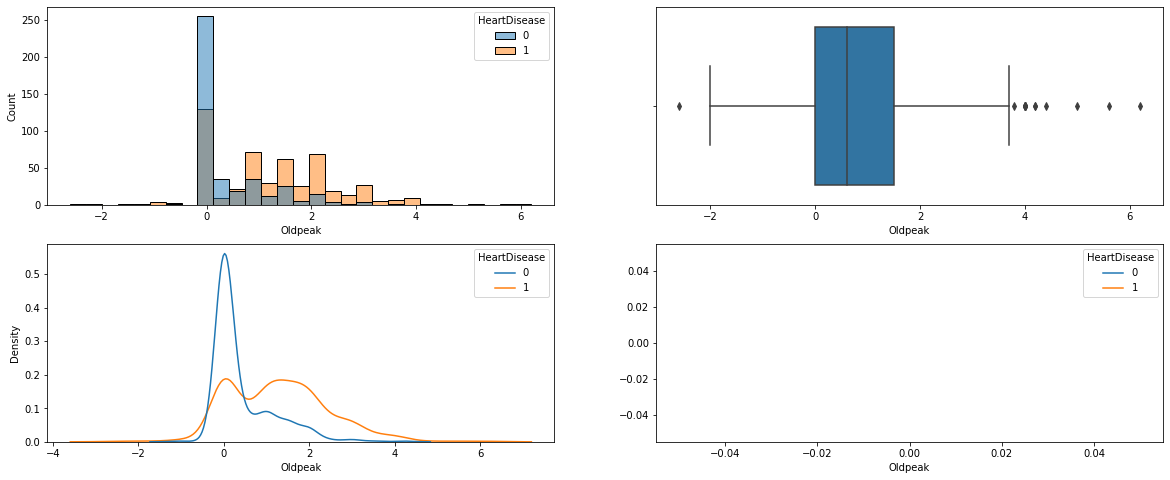

In [110]:
fig, ax=plt.subplots(2,2, figsize=(20,8))
sns.histplot(data=heart, x='Oldpeak', hue='HeartDisease', legend=True, ax=ax[0,0])
sns.boxplot(data=heart, x='Oldpeak', hue='HeartDisease', ax=ax[0,1])
sns.kdeplot(data=heart, x='Oldpeak', hue='HeartDisease', legend=True, ax=ax[1,0])
sns.lineplot(data=heart, x='Oldpeak', hue='HeartDisease', legend=True, ax=ax[1,1])

in the oldpeak there are some outliers with respect to rest of the data

healthy people have oldpeak of 0, or below 1 at least.

**conclusions;**
- **healthy people have oldpeak 0, but some do have oldpeak greater**
- **most of the patients have oldpeak greater than 1**
- **another major proportion of patients have oldpeak of 0**

In [111]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'HeartRatePct'],
      dtype='object')

#### **ST_Slope vs HeartDisease**

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

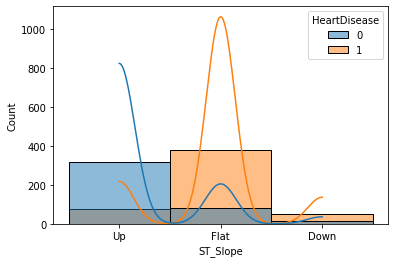

In [118]:
sns.histplot(data=heart, x='ST_Slope', 
                hue='HeartDisease', legend=True, kde=True)

most of the patients have a flat ST_Slope, except a few having up and down

**conclusions;**
- **most of the patients have Flat ST_Slope, with a few in Up and Down**

In [124]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'HeartRatePct'],
      dtype='object')

#### **HeartRatePct vs HeartDisease**

<AxesSubplot:xlabel='HeartRatePct', ylabel='HeartDisease'>

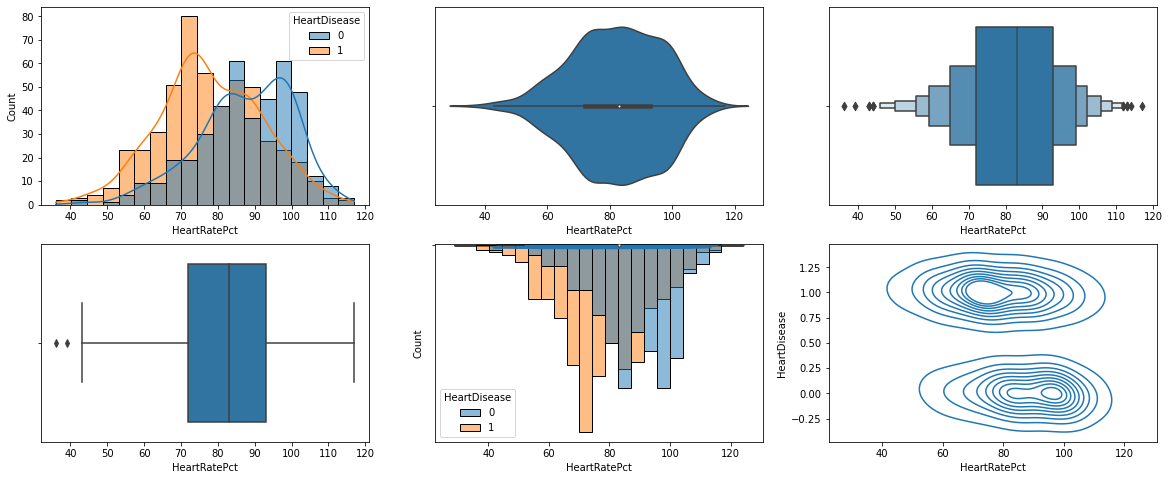

In [125]:
fig,ax = plt.subplots(2,3, figsize=(20,8))
sns.histplot(data=heart, x='HeartRatePct', hue='HeartDisease', legend=True, kde=True, ax=ax[0,0])
sns.violinplot(data=heart, x='HeartRatePct', hue='HeartDisease', ax=ax[0,1])
sns.boxenplot(data=heart, x='HeartRatePct', hue='HeartDisease', ax=ax[0,2])
sns.boxplot(data=heart, x='HeartRatePct', hue='HeartDisease', ax=ax[1,0])
sns.violinplot(data=heart, x='HeartRatePct', hue='HeartDisease', ax=ax[1,1])
sns.histplot(data=heart, x='HeartRatePct', hue='HeartDisease', ax=ax[1,1])
sns.kdeplot(data=heart, x='HeartRatePct', y='HeartDisease', legend=True, ax=ax[1,1])
sns.kdeplot(data=heart, x='HeartRatePct', y='HeartDisease', legend=True, ax=ax[1,2])

HR should b/w 64% and 94% fo MaxHR that is 220-Age